## Identifying Customer Pain Points for a Newly Launched Product Through use of Sentimental Analysis – A case study of Kenyan Banking Space (Kenya Police Sacco)

## Problem Statement

#### Organizations are undertaking digital transformation projects in order to improve quality and efficiency of services and products they offer. 

#### In the financial space this entails mainly a change in their CBS (Core Banking Systems) and other interacting traditional systems such as CRM ( Customer Relationship Management) and DMS ( Document Management Systems)  and with more recently mobile banking interfaces. 

#### The adoption of mobile has increased the way customers acccess their existing funds and new credit facilities - mobile loans. As such a change in the mobile banking platforms means an abrupt change in the customer experience, especially during the early stages of the implementation

#### The feedback received by marketing teams and product managers at this earlier stages is crucial in improving the customer experience. Traditionally this feedback has been obtained from customer surveys, questionnaires which take time to conduct.  

#### Organizations can take use of data from social media to help get feedback on their newly launched products and services, from which they can use to identify customer paints, and rapidly solve them. 



## Importing the Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer

## Data Description and Basic Cleaning

#### The dataset used in this project are reviews from Google Playstore and Facebook comments.

#### The reviews are downloaded reviews for M-Tawi Application in Google playstore - obtained using the google developer account. 

#### The facebook comments are data parsed from the Sacco's official Facebook page, using the parsing tool Octoparse. The posts used in parsing are posts which specifically marketed the afforementioned application. 


#### Data from the two sources were combined into a single csv file, that consists of three columns that were common in both files, that is comment link, source and comment.

#### Blank rows within the dataset were removed, with the comment column being used to set the criteria for removing the blanks. 

#### After dropping the dataset, each of the rows were then manually tagged by colleagues and I, into two classes;  that is Positive and Negative. Additionally any comment which was not tagged into these two categories, were taken as neutral to form the third class, Neutral. This column was added to the csv file to form the fourth column which is the label field. 

#### The final comments file were stored in a comments_data.csv file that consists of 335 rows, whose characteristics are shown in the cells below.

In [2]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 3C62-F0AB

 Directory of C:\Users\brian.samba\Documents\Computation Intelligence\LT\Sentiment Analysis

18/12/2020  14:17    <DIR>          .
18/12/2020  14:17    <DIR>          ..
18/12/2020  10:01    <DIR>          .ipynb_checkpoints
15/12/2020  21:58            66,546 all_data_no_blanks - Copy.csv
15/12/2020  21:30            87,279 all_data_no_blanks.csv
16/12/2020  12:04            66,554 comments_data.csv
04/12/2020  23:02                67 credentials.json
15/12/2020  21:59    <DIR>          Data
05/12/2020  09:18                45 profiles_urls.json
05/12/2020  07:52            14,620 Scrapping.ipynb
05/12/2020  09:07             7,018 scrapping.py
11/12/2020  11:58         9,464,236 Sentiment Analysis -  Walkthrough.ipynb
14/12/2020  10:16           257,839 Sentiment Analysis - Customer Pain Point Identification.ipynb
16/12/2020  17:42           281,786 Sentiment Analysis - Customer Pain Point Identification-Copy1.ipynb
16/12/2

In [3]:
#load the comments dataset into a pandas dataframe
data = pd.read_csv('comments_data.csv')

In [4]:
# check for null values in the dataset
data.isnull().sum()

Comment_Link    0
Source          0
Comment         0
Label           0
dtype: int64

In [5]:
# check the number of rows and columns present in the dataset
data.shape

(335, 4)

In [6]:
# chck basic statistics of the dataset
data.describe()

,Comment_Link,Source,Comment,Label
count,335,335,335,335
unique,125,2,318,3
top,https://www.facebook.com/POLICESACCO/posts/317...,Facebook,Good,Negative
freq,98,213,6,204


In [7]:
# Check the values of the first five rows(observations) of the dataset
data.head(5)


,Comment_Link,Source,Comment,Label
0,http://play.google.com/console/developers/6882...,Play Store,Great slick App. Taking Sacco business to the ...,Positive
1,http://play.google.com/console/developers/6882...,Play Store,Very good app in paying Bill's and I like the ...,Positive
2,http://play.google.com/console/developers/6882...,Play Store,Have just installed it and it's working very w...,Positive
3,http://play.google.com/console/developers/6882...,Play Store,Good,Positive
4,http://play.google.com/console/developers/6882...,Play Store,I like it because its very fast,Positive


In [8]:
# Check the values of the last five rows(observations) of the dataset
data.tail(5)

,Comment_Link,Source,Comment,Label
330,https://www.facebook.com/POLICESACCO/posts/318...,Facebook,Why is the app not working when u put the numb...,Negative
331,https://www.facebook.com/POLICESACCO/posts/318...,Facebook,Isn't working for me!?,Negative
332,https://www.facebook.com/POLICESACCO/posts/318...,Facebook,Mhhhh,Neutral
333,https://www.facebook.com/POLICESACCO/posts/318...,Facebook,I did some deposits yesterday and can't see an...,Negative
334,https://www.facebook.com/POLICESACCO/posts/318...,Facebook,Should we delete the msacco app,Neutral


## Data Preprocessing and Visualization

#### Data Preprocessing

##### Removal of Tags, punctuation, numbers and conversion to lowercase function definition

In [9]:
# Functon to remove punctuation, tags, numbers and conversion to lower case

def preprocessing(comments):
    
    preprocessed_comments = []
    for comment in comments:
        new_text = re.sub('<.*?>','', comment) # removes HTML Tags
        new_text = re.sub(r'[^\w\s]','',new_text) # removes punctuation
        new_text = re.sub(r'\d+','',new_text) # removes numbers
        new_text = new_text.lower() # converts to lower case
        
        if new_text != '':
            preprocessed_comments.append(new_text)
            
    return preprocessed_comments
    

##### Tokenization Function

In [10]:
# Tokenization function
def tokenization(preprocessed_comments):
    tokenized_comments = []
    for comment in preprocessed_comments:
        w_token = word_tokenize(comment)
        if w_token != '':
            tokenized_comments.append(w_token)
        
    return tokenized_comments
    

##### Stopwords Removal Function

In [11]:
# Stopword Removal function 
def remove_stopwords(tokenized_comments, stopwords):
    
    comments_no_stopwords = []
    for comment in tokenized_comments:
        cleaned_list =[]
        for word in comment:
            if word not in stopwords:
                cleaned_list.append(word)
        comments_no_stopwords.append(cleaned_list)
    
    return comments_no_stopwords

    
    

##### Lemmatization Function

In [12]:
def lemmatization(comments_no_stopwords):
    
    lemmatizer = WordNetLemmatizer()    
    lemmatized_comments = []
    
    for comment in comments_no_stopwords:
        lemmatized_words = []
        for word in comment:
            if word != '':
                lemmatized_words.append(lemmatizer.lemmatize(word))
            
        lemmatized_comments.append(lemmatized_words)
        
    return lemmatized_comments
    

##### Defining the stopwords and Invoking the four functions to perform preprocessing

In [13]:
# set stopwords to swahili + english stopwords
swahili_stopwords = ["akasema","alikuwa","alisema","baada","basi","bila","cha","chini",
                     "hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu",
                     "kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa",
                     "kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi",
                     "mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng",
                     "ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti",
                     "tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao",
                     "watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]

stopwords = set(stopwords.words('english') + swahili_stopwords)

In [14]:
#comments = data['Comment']
#labels = data['Label']

df = data[['Comment', 'Label']]

preprocessed_comments = preprocessing(df.Comment)
tokenized_comments = tokenization(preprocessed_comments)
comments_no_stopwords = remove_stopwords(tokenized_comments, stopwords)

lemmatized_comments = lemmatization(comments_no_stopwords)


#print(len(lemmatized_comments))


#### Visualization

##### Creation of a Wordcloud

In [44]:
# create a list of all the words
all_words = []

for comment in lemmatized_comments:
    for word in comment:
        all_words.append(word)

all_words

['great',
 'slick',
 'app',
 'taking',
 'sacco',
 'business',
 'next',
 'level',
 'kudos',
 'police',
 'sacco',
 'kume',
 'pambazuka',
 'good',
 'app',
 'paying',
 'bill',
 'like',
 'introduction',
 'airtel',
 'money',
 'fast',
 'efficient',
 'please',
 'next',
 'update',
 'introduce',
 'fingerprint',
 'installed',
 'working',
 'well',
 'keep',
 'good',
 'like',
 'fast',
 'cant',
 'activate',
 'app',
 'cant',
 'activate',
 'application',
 'crack',
 'easily',
 'unresponsive',
 'slow',
 'stressful',
 'call',
 'customer',
 'care',
 'assistance',
 'find',
 'another',
 'ugly',
 'response',
 'eish',
 'non',
 'responsive',
 'cant',
 'activate',
 'app',
 'get',
 'already',
 'registered',
 'cant',
 'even',
 'use',
 'ussd',
 'cant',
 'activatedfix',
 'plz',
 'error',
 'everytime',
 'marvelous',
 'working',
 'problem',
 'functioning',
 'mtawi',
 'app',
 'downloading',
 'fullest',
 'responding',
 'great',
 'good',
 'brilliant',
 'customer',
 'journey',
 'efficient',
 'service',
 'offered',
 'explo

In [45]:
# count of the most common words
from collections import Counter
word_counter = Counter(all_words)
most_common_words = word_counter.most_common()
most_common_words

[('app', 80),
 ('working', 31),
 ('hii', 28),
 ('cant', 26),
 ('good', 24),
 ('sacco', 23),
 ('code', 22),
 ('account', 19),
 ('u', 19),
 ('time', 15),
 ('balance', 11),
 ('msacco', 11),
 ('police', 10),
 ('get', 10),
 ('one', 10),
 ('new', 10),
 ('member', 10),
 ('tawi', 10),
 ('like', 9),
 ('money', 9),
 ('use', 9),
 ('mpesa', 9),
 ('pin', 9),
 ('loan', 9),
 ('whats', 9),
 ('pesa', 9),
 ('keep', 8),
 ('even', 8),
 ('ussd', 8),
 ('service', 8),
 ('useless', 8),
 ('nice', 8),
 ('access', 8),
 ('registered', 7),
 ('mtawi', 7),
 ('poor', 7),
 ('yet', 7),
 ('dont', 7),
 ('help', 7),
 ('haifanyi', 7),
 ('tried', 7),
 ('wrong', 7),
 ('system', 7),
 ('update', 6),
 ('activate', 6),
 ('customer', 6),
 ('plz', 6),
 ('activation', 6),
 ('first', 6),
 ('thing', 6),
 ('take', 6),
 ('need', 6),
 ('showing', 6),
 ('better', 6),
 ('download', 6),
 ('number', 6),
 ('deposited', 6),
 ('available', 6),
 ('n', 6),
 ('cash', 6),
 ('bill', 5),
 ('fast', 5),
 ('efficient', 5),
 ('problem', 5),
 ('excellent

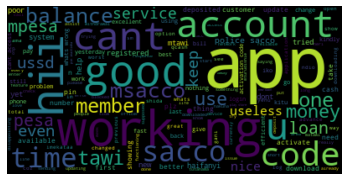

In [17]:
# visualization of the most common words using a wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

textt= " ".join(word for word in all_words)
wordcloud = WordCloud().generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordCloud1.png')
plt.show()



##### Visualization of the sentiments through use of a histogram

In [18]:
# visualization of the sentiments count through use of a dictionary

sentiments = {
    "Positive": sum(df.Label == 'Positive'),
    "Negative": sum(df.Label == 'Negative'),
    "Neutral": sum(df.Label == 'Neutral')
}

sentiments


{'Positive': 74, 'Negative': 204, 'Neutral': 57}

In [19]:
# Histogram plot of the sentiments

%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

fig = px.histogram(df['Label'], x ='Label')
fig.update_traces(marker_color='red', marker_line_color='rgb(8,4,8,107)')
fig.update_layout(title_text="Mobile Banking Platform Sentiments")
fig.show()

#### Vectorization of the Processed Comments

In [20]:
# Vectorization using Sklearn Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

docs = []

for comment in lemmatized_comments:
    docs.append(' '.join(word for word in comment))

vectorizer = CountVectorizer(docs)
vectors = vectorizer.fit_transform(docs)

#print("Vocabulary: ", vectorizer.vocabulary_)
#print("Vector shape: ", vectors.shape)
#print("10th vector: {}".format(vectors[10].toarray()))

In [21]:
# Vectorization using sklearn tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(docs)
tfidfvectors = tfidfvectorizer.fit_transform(docs)

#print("Vocabulary: ", tfidfvectorizer.vocabulary_)
#print("Vector shape: ", tfidfvectors.shape)
#print("10th vector: {}".format(tfidfvectors[10].toarray()))

## Building the Classifier

* ##### The vectors used in the classification were the ones derived using the tfidf vectorization method 

* ##### Three classification algorithms are used for building the classifier that is RandomForest, Naive Bayes, and Support Vectors Classifier and a comparison of their performances done.

* ##### The train_test split and kfold model selection methods of sklearn were used to perform one-fold and 5 -fold cross validation were run on the vectorized feature set and performance also compared

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [23]:
# Using the features extracted from tfidf vectorizer

X = tfidfvectors.toarray()
y = df.Label.astype('category').cat.codes

# labels = {'Negative: 0, 'Neutral': 1, 'Positive': 2}
#


In [43]:
#df['Label']
#y.head(20)

In [26]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
predictions = text_classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[30 10  0]
 [ 6  6  0]
 [ 2  2 11]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.33      0.50      0.40        12
           2       1.00      0.73      0.85        15

    accuracy                           0.70        67
   macro avg       0.71      0.66      0.67        67
weighted avg       0.75      0.70      0.72        67

0.7014925373134329


In [30]:
rfclassifier_wfold = RandomForestClassifier(n_estimators=200, random_state=0)

rf_scores = []
folds = KFold(n_splits=5, random_state=42, shuffle=False)

for train_index, test_index in folds.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index],y[test_index]
    rfclassifier_wfold.fit(X_train, y_train)
    rf_scores.append(rfclassifier_wfold.score(X_test,y_test))

print(np.mean(rf_scores))


0.6447761194029851


#####  Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
naiveB_predictions = gnb.predict(X_test)

In [33]:
print(confusion_matrix(y_test, naiveB_predictions))
print(classification_report(y_test, naiveB_predictions))
print(accuracy_score(y_test, naiveB_predictions))

[[39  5  3]
 [ 5  3  3]
 [ 4  1  4]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.33      0.27      0.30        11
           2       0.40      0.44      0.42         9

    accuracy                           0.69        67
   macro avg       0.52      0.52      0.51        67
weighted avg       0.68      0.69      0.68        67

0.6865671641791045


In [34]:
nbclassifier_wfold = GaussianNB()

nb_scores = []
folds = KFold(n_splits=5, random_state=42, shuffle=False)

for train_index, test_index in folds.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index],y[test_index]
    nbclassifier_wfold.fit(X_train, y_train)
    nb_scores.append(nbclassifier_wfold.score(X_test,y_test))

print(np.mean(nb_scores))

0.7044776119402986


##### Support Vector Classifier

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
sv_predictions = svclassifier.predict(X_test)

print(confusion_matrix(y_test, sv_predictions))
print(classification_report(y_test, sv_predictions))
print(accuracy_score(y_test, sv_predictions))

[[47  0  0]
 [ 9  2  0]
 [ 5  0  4]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        47
           1       1.00      0.18      0.31        11
           2       1.00      0.44      0.62         9

    accuracy                           0.79        67
   macro avg       0.92      0.54      0.60        67
weighted avg       0.84      0.79      0.74        67

0.7910447761194029


In [37]:
svclassifier_wfold = SVC(kernel='linear')

scores = []
folds = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in folds.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index],y[test_index]
    svclassifier_wfold.fit(X_train, y_train)
    scores.append(svclassifier_wfold.score(X_test,y_test))
    
print(np.mean(scores))

0.7492537313432835
